## Objective : To predict the percentage of marks that a student is expected ro score based on the number of hours they studied. 

## Approach : I'm going to  use Simple Linear Regression as the data contains only 2 variables 

In [3]:
#importing the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Getting the data. 

In [9]:
data=pd.read_csv('http://bit.ly/w-data')

### Let's see first 5 rows of the Data

In [10]:
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


### Let's gather more information about the data 

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [15]:
print('the shape of the given data is : ', data.shape)

the shape of the given data is :  (25, 2)


### Let's see if any null values exist in the data

In [16]:
data.isnull().sum()

Hours     0
Scores    0
dtype: int64

### Checking a statistical overview of the data

In [17]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


### Visualizing the data  

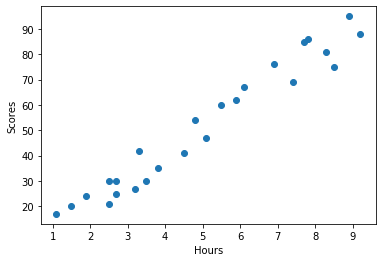

In [26]:
plt.scatter(data.Hours , data.Scores )
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.show()

#### from the above diagram it's pretty clear that there exist a linear relationship between Hours and Scores

### Separating the data into Tatget and input variables : 

In [31]:
# X is the input variable and y is the target variable
X=data[['Hours']]
y=data[['Scores']]
print('Shape of X : ', X.shape)
print('shape of y : ', y.shape)

Shape of X :  (25, 1)
shape of y :  (25, 1)


##### Train test split

In [61]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size=0.33 , random_state=33 )

#### Creating the Linear Regression model

In [62]:
from sklearn.linear_model import LinearRegression

model=LinearRegression()

#### Let's fit the model with our data

In [63]:
model.fit(X_train , y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [64]:
print('coefficiets: ' , model.coef_)
print('intercepts: ',model.intercept_)

coefficiets:  [[9.24209978]]
intercepts:  [5.15884362]


#### Predictions 

In [65]:
pred=model.predict(X_test)

In [66]:
pd.DataFrame(np.c_[X_test, y_test, pred] , columns= ['Hours' , 'Given Scores', 'Predicted Scores'])

,Hours,Given Scores,Predicted Scores
0,7.8,86.0,77.247222
1,8.9,95.0,87.413532
2,1.9,24.0,22.718833
3,1.5,20.0,19.021993
4,3.5,30.0,37.506193
5,5.9,62.0,59.687232
6,3.8,35.0,40.278823
7,8.3,81.0,81.868272
8,2.5,21.0,28.264093


### Checking the Accuracy

In [67]:
model.score(X_test, y_test)

0.9625188960565599

we can see 96% accuracy approx which looks pretty satisfactory. 

## Time to test the model,  enter the no. of hours to get the predicted score! 

In [77]:
n=float(input())
result=model.predict([[n]])
print('After studying for ', n , 'hours , the predicted score is : {}'.format(result.round(2)))

9.25
After studying for  9.25 hours , the predicted score is : [[90.65]]
